In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import math
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import SpatialMetrics
import TemporalMetrics

This is the raw data. We have 10 rectangles with (id, x, y, width, height) information.

In [76]:
history = Parser.parse_rectangles('app', 'calcuta')
df = history[30]
N = len(df)
df.head(10)


,id,x,y,w,h
0,root/p/src/main/AndroidManifest.xml,659.399906,940.770784,340.600094,48.331929
1,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,674.793942,120.156158,19.296321
2,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,422.293764,150.990614,271.796499
3,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,528.141905,120.156158,146.652037
4,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,422.293764,258.475457,105.848141
5,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,528.141905,138.319299,165.948357
6,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,281.360563,694.090263,128.105508,295.012450
7,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,135.127113,817.761418,84.084234,126.842210
8,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,694.090263,135.127113,250.513365
9,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,219.211347,817.761418,62.149216,67.151758


Here I compute the width and height of the base rectangle. The base rectangle is 1000 x 1000 pixels, so the total area is 1000000.

In [32]:
total_area = (df['x'] + df['w']).max() * (df['y'] + df['h']).max()
total_area

1000000.0000000002

Then I compute the relative weight of cells, and confirm that the sum of weights is 1.

In [78]:
df['weight'] = (df['w'] * df['h']) / total_area 
print('Sum of the weight column = ' + str(df['weight'].sum()))

Sum of the weight column = 1.0


In [34]:
df['q_ar'] = df[['w', 'h']].min(axis=1) / df[['w', 'h']].max(axis=1)
df

,id,x,y,w,h,weight,q_ar
0,root/p/src/main/AndroidManifest.xml,659.399906,940.770784,340.600094,48.331929,0.016462,0.141902
1,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,674.793942,120.156158,19.296321,0.002319,0.160594
2,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,422.293764,150.990614,271.796499,0.041039,0.555528
3,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,528.141905,120.156158,146.652037,0.017621,0.819328
4,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,422.293764,258.475457,105.848141,0.027359,0.409509
5,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,528.141905,138.319299,165.948357,0.022954,0.833508
6,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,281.360563,694.090263,128.105508,295.012450,0.037793,0.434238
7,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,135.127113,817.761418,84.084234,126.842210,0.010665,0.662904
8,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,694.090263,135.127113,250.513365,0.033851,0.539401
9,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,219.211347,817.761418,62.149216,67.151758,0.004173,0.925504


Lastly, I create a new column by multiplying columns 'q_ar' and 'weight'. 
Now we can see the weighted aspect ratio score for each cell.

We then can compute some statistics about the distribution of the two metrics.

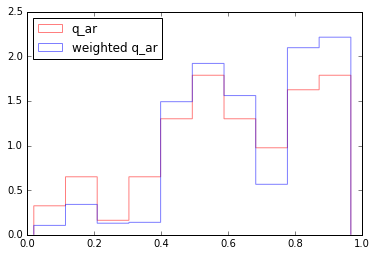

In [62]:
fig, ax = plt.subplots()
ax.hist(df['q_ar'], normed=1, histtype='step', color='r', alpha=0.5, label='q_ar');
ax.hist(df['q_ar'], normed=1, weights=df['weight'], histtype='step', color='b', alpha=0.5, label='weighted q_ar');
plt.legend(loc='upper left')

In [57]:
df['q_ar'].describe()

count    65.000000
mean      0.613809
std       0.245810
min       0.019699
25%       0.486034
50%       0.623747
75%       0.833508
max       0.966678
Name: q_ar, dtype: float64

In [66]:
df['q_w_ar'] = N * df['q_ar'] * df['weight']
df.head(15)

,id,x,y,w,h,weight,q_ar,q_w_ar
0,root/p/src/main/AndroidManifest.xml,659.399906,940.770784,340.600094,48.331929,0.016462,0.141902,0.151838
1,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,674.793942,120.156158,19.296321,0.002319,0.160594,0.024203
2,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,422.293764,150.990614,271.796499,0.041039,0.555528,1.481881
3,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,289.309912,528.141905,120.156158,146.652037,0.017621,0.819328,0.938438
4,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,422.293764,258.475457,105.848141,0.027359,0.409509,0.728249
5,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,150.990614,528.141905,138.319299,165.948357,0.022954,0.833508,1.243595
6,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,281.360563,694.090263,128.105508,295.012450,0.037793,0.434238,1.066716
7,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,135.127113,817.761418,84.084234,126.842210,0.010665,0.662904,0.459560
8,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,0.000000,694.090263,135.127113,250.513365,0.033851,0.539401,1.186857
9,root/p/src/main/java/com/iwsbrazil/calcuta/mod...,219.211347,817.761418,62.149216,67.151758,0.004173,0.925504,0.251064


In [67]:
df['q_w_ar'].describe()

count    65.000000
mean      0.662840
std       1.003297
min       0.007719
25%       0.128711
50%       0.406045
75%       0.720129
max       6.072361
Name: q_w_ar, dtype: float64

In [74]:
print('mean q_ar =   ' + str(df['q_ar'].mean()))
print('mean q_w_ar = ' + str(df['q_w_ar'].mean()))

mean q_ar =   0.613808829148
mean q_w_ar = 0.662839938891
